In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



# Handling missing values, outliers


In [2]:
# Load dataset
placement_data_df = pd.read_csv('Placement_Data_Full_Class.csv')

# 1. Handle missing values
# Impute missing values for salary with median
placement_data_df['salary'] = placement_data_df['salary'].fillna(placement_data_df['salary'].median())

# Dropping rows where 'status' is missing since it's important
placement_data_df = placement_data_df.dropna(subset=['status'])

# 2. Encoding categorical variables
# Label Encoding for binary categories
label_encoder = LabelEncoder()
placement_data_df['gender'] = label_encoder.fit_transform(placement_data_df['gender'])  # 0: Female, 1: Male
placement_data_df['workex'] = label_encoder.fit_transform(placement_data_df['workex'])  # 0: No, 1: Yes
placement_data_df['status'] = label_encoder.fit_transform(placement_data_df['status'])  # 0: Not Placed, 1: Placed

# One-Hot Encoding for multi-category columns
data = pd.get_dummies(placement_data_df, columns=['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation'], drop_first=True)

# 3. Handle outliers
# Select only numeric columns for outlier detection
numeric_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows that are outliers in any numeric column
data = data[~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)]

# 4. Feature scaling
scaler = StandardScaler()

# Scale the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Now 'data' is preprocessed and ready for PCA or any other analysis.


# Encoding

# Perform PCA

Principal Component 1: 0.3315 (0.3315 cumulative)
Principal Component 2: 0.1340 (0.4655 cumulative)
Principal Component 3: 0.1188 (0.5843 cumulative)
Principal Component 4: 0.1093 (0.6936 cumulative)
Principal Component 5: 0.0783 (0.7719 cumulative)
Principal Component 6: 0.0604 (0.8324 cumulative)
Principal Component 7: 0.0453 (0.8777 cumulative)
Principal Component 8: 0.0386 (0.9163 cumulative)
Principal Component 9: 0.0272 (0.9435 cumulative)
Principal Component 10: 0.0211 (0.9646 cumulative)
Principal Component 11: 0.0148 (0.9794 cumulative)
Principal Component 12: 0.0128 (0.9922 cumulative)
Principal Component 13: 0.0051 (0.9973 cumulative)
Principal Component 14: 0.0027 (1.0000 cumulative)


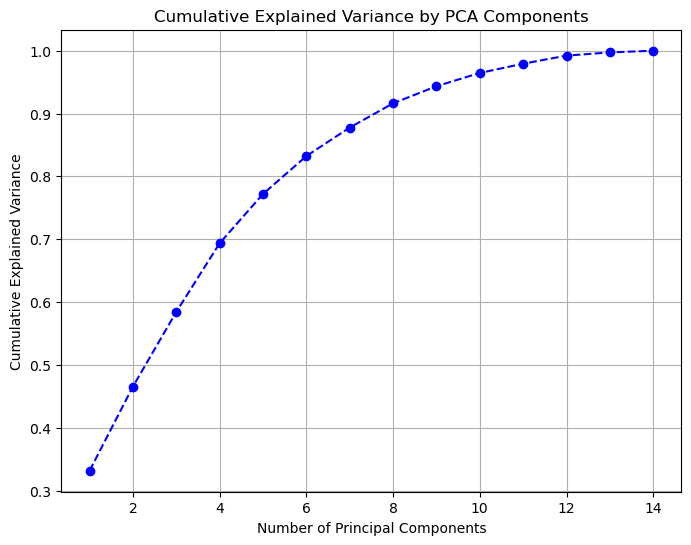

Number of components explaining 90% variance: 8


In [3]:


# Assuming the preprocessed data is stored in a variable called 'data'
# Drop target variables (if any) before applying PCA
X = data.drop(columns=['sl_no', 'status', 'salary'])  # 'sl_no', 'status', and 'salary' are not used for PCA

# 1. Perform PCA
pca = PCA(n_components=None)  # None keeps all components
X_pca = pca.fit_transform(X)

# 2. Explained variance ratio (proportion of variance explained by each principal component)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print explained variance for each component
for i, var in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

# 3. Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# 4. Choose the number of components (e.g., to explain 90% variance)
# You can select the number of components based on the explained variance plot
# Example: choose components that explain at least 90% of the variance
n_components_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components_90_variance}")

# 5. Reduce data to selected components
pca = PCA(n_components=n_components_90_variance)
X_reduced = pca.fit_transform(X)

# Now 'X_reduced' contains the reduced dataset based on selected principal components


The graph you provided shows the **Cumulative Explained Variance by PCA Components**, which is a common way to visualize how much of the dataset’s total variance is captured by adding each principal component (PC).

### Interpretation of the Graph:

- **X-Axis (Number of Principal Components)**: This shows the number of principal components. Each component represents a linear combination of the original features of the dataset, where each subsequent component captures as much of the remaining variance as possible while being orthogonal to the preceding ones.
  
- **Y-Axis (Cumulative Explained Variance)**: This shows the cumulative explained variance ratio. It's the cumulative percentage of variance in the dataset that is explained by the principal components, as you add more components.

- **Curve**: 
    - The first few components capture the majority of the variance. 
    - From the curve, it seems that around the 10th component, almost 95-98% of the variance is explained. This indicates that adding more components beyond this point does not significantly increase the explained variance.

### Key Takeaways:

1. **Dimensionality Reduction**: 
   - **Why PCA is important**: By using PCA, you can reduce the number of dimensions (features) in the dataset while retaining most of the variability (information). 
   - In this case, you can potentially reduce the dataset to around 10 principal components without losing much variance (as opposed to keeping all 14 features).
   
2. **Variance Distribution**: 
   - The graph shows that the first 5 or so components explain around **80-90% of the variance**. This suggests that those components hold most of the essential information from the original dataset.
   - The **remaining components** add relatively less information.

3. **Scree Plot Identification**: 
   - The curve begins to level off after about **10 components**, meaning that these components capture most of the significant variance.
   - A good point to stop adding components is when the cumulative explained variance stabilizes (plateaus), as adding more components beyond that point contributes very little additional information.

### Impact of PCA on the Dataset:

- **Improved Model Efficiency**: By using only the first few principal components, you reduce the dimensionality of the dataset, making machine learning algorithms more efficient in terms of computation and memory usage, without a significant loss of accuracy.
  
- **Eliminating Redundancy**: PCA helps by reducing multicollinearity (highly correlated features). In this dataset, the first few components already capture most of the information, so the rest may be considered as noise or redundant data.
  
- **Easier Visualization**: With PCA, it's easier to visualize the data in a lower-dimensional space. For example, if the first two or three principal components explain a significant portion of the variance, you could plot the data in two or three dimensions.

In summary, PCA simplifies the dataset by reducing its complexity while retaining most of the information. Based on your graph, you can use around **10 components** and still maintain almost all of the variability present in the original data.

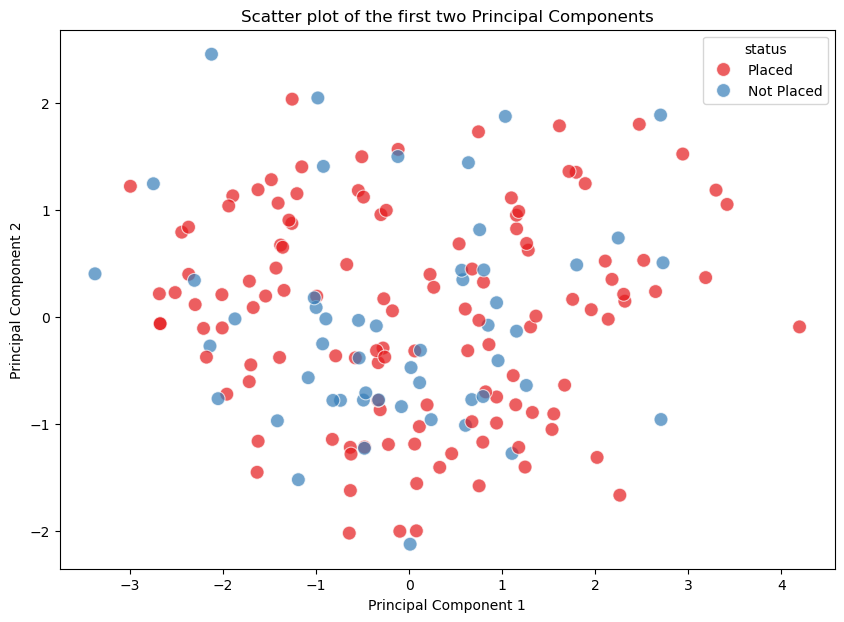

In [5]:

# Assuming PCA has already been performed and `pca_data` contains the transformed data
# The first two principal components
pca_df = pd.DataFrame(X_reduced[:, :2], columns=['PC1', 'PC2'])

# Add the 'status' (target) to the PCA DataFrame for coloring
pca_df['status'] = placement_data_df['status']

# Map status to readable labels for the plot
pca_df['status'] = pca_df['status'].map({0: 'Not Placed', 1: 'Placed'})

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='status', data=pca_df, palette='Set1', s=100, alpha=0.7)

# Adding title and labels
plt.title('Scatter plot of the first two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


The scatter plot you've shared represents the first two principal components (PC1 and PC2) from the PCA analysis of the dataset. The points are color-coded by the placement status: red for "Placed" and blue for "Not Placed."

### Interpretation:
- **Principal Component Analysis (PCA)**: PCA reduces the dimensionality of the data by transforming the original features into a set of principal components that capture the maximum variance in the dataset. The plot here shows how the data points are distributed in the space of the first two components, PC1 and PC2, which together capture a significant portion of the variance in the dataset (as seen from the cumulative explained variance plot).
  
- **Clusters**:
  - **Overlap**: There is a lot of overlap between the red and blue points. This means that in the 2D space of the first two principal components, there is no strong, clear separation between the "Placed" and "Not Placed" students. The overlap suggests that these two groups are not easily distinguishable based on the information captured in PC1 and PC2 alone.
  
- **Patterns**: Although some small clusters of "Placed" or "Not Placed" points may be visible, there isn't a strong clustering pattern where all "Placed" points group together in one region and "Not Placed" points in another. This indicates that the distinction between "Placed" and "Not Placed" may require more complex features or additional components beyond the first two principal components.

### Is it Good or Bad?
- **Not Ideal for Classification**: 
  - The lack of clear separation between "Placed" and "Not Placed" suggests that PCA, at least with just the first two components, might not be sufficient to classify or separate the two groups effectively.
  - If the goal was to easily distinguish between the two classes using PCA, this result would indicate that more advanced techniques (or using more components) might be needed.

- **What Can Be Improved**:
  - **Use more principal components**: The cumulative explained variance plot shows that the first two principal components don't capture all the variance. You might need to consider additional components for better classification or clustering.
  - **Alternative methods**: If PCA isn't producing a strong separation between the classes, you could consider other dimensionality reduction techniques such as t-SNE or UMAP, which are often more effective for visualizing complex patterns in classification tasks.

### Next Steps:
1. **Explore More Components**: You could explore the impact of adding more principal components. For example, a 3D scatter plot using the first three components might provide additional insights.
2. **Feature Engineering**: You could also explore whether additional feature engineering or transformations might help improve separation in the PCA space.
3. **Classifiers**: Since PCA may not produce clear separations, applying machine learning classification algorithms (e.g., logistic regression, decision trees, SVM, etc.) might yield better results for predicting placement status.

In conclusion, while the scatter plot provides some insights, it suggests that further analysis is needed to achieve better classification performance.